In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report

In [12]:
train_path = r"F:\01_Dataset\01_Computer Vision\02 Concrete Cracking\Train"
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_set = train_datagen.flow_from_directory(train_path,target_size=(128,128),class_mode='sparse')

Found 1056 images belonging to 2 classes.


In [13]:
val_path = r"F:\01_Dataset\01_Computer Vision\02 Concrete Cracking\Validation"
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_set = val_datagen.flow_from_directory(val_path,target_size=(128,128),class_mode='sparse')

Found 462 images belonging to 2 classes.


In [14]:
base_model = ResNet50(include_top=False,input_shape=(128,128,3))

In [15]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [17]:
base_model.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',verbose=1,patience=5)
hist = model.fit(train_set,validation_data=val_set,epochs=20,verbose=1,callbacks=[es])

Epoch 1/20
33/33 [==============================] - 32s 928ms/step - loss: 0.2629 - accuracy: 0.9479 - val_loss: 0.1809 - val_accuracy: 0.9870
Epoch 2/20
33/33 [==============================] - 29s 891ms/step - loss: 0.0332 - accuracy: 0.9972 - val_loss: 0.0836 - val_accuracy: 0.9957
Epoch 3/20
33/33 [==============================] - 31s 940ms/step - loss: 0.0145 - accuracy: 0.9972 - val_loss: 0.0091 - val_accuracy: 0.9957
Epoch 4/20
33/33 [==============================] - 30s 919ms/step - loss: 0.0132 - accuracy: 0.9991 - val_loss: 0.0143 - val_accuracy: 0.9978
Epoch 5/20
33/33 [==============================] - 30s 928ms/step - loss: 0.0564 - accuracy: 0.9953 - val_loss: 1.0414e-06 - val_accuracy: 1.0000
Epoch 6/20
33/33 [==============================] - 30s 909ms/step - loss: 0.0369 - accuracy: 0.9962 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
33/33 [==============================] - 30s 918ms/step - loss: 4.9264e-05 - accuracy: 1.0000 - val_loss: 0.0659 - val_accu

In [34]:
image = []
test_set = []
pred_set = []
test_path = r"F:\01_Dataset\01_Computer Vision\02 Concrete Cracking"
file_name = os.listdir(r"F:\01_Dataset\01_Computer Vision\02 Concrete Cracking\Test") 
for i in range(6):
    path = test_path + "\\Test\\" + file_name[i]
    img = load_img(path,target_size=(128,128))
    image.append(img)
    img_2 = img_to_array(img)
    img_2 = preprocess_input(img_2)
    test_set.append(img_2)
for i in range(6):   
    y_p = np.expand_dims(test_set[i],axis=0)
    y_p = model.predict(y_p)
    y_p = np.argmax(y_p)
    pred_set.append(y_p)

In [35]:
classes = {0:'Crack',1:'NonCrack'}

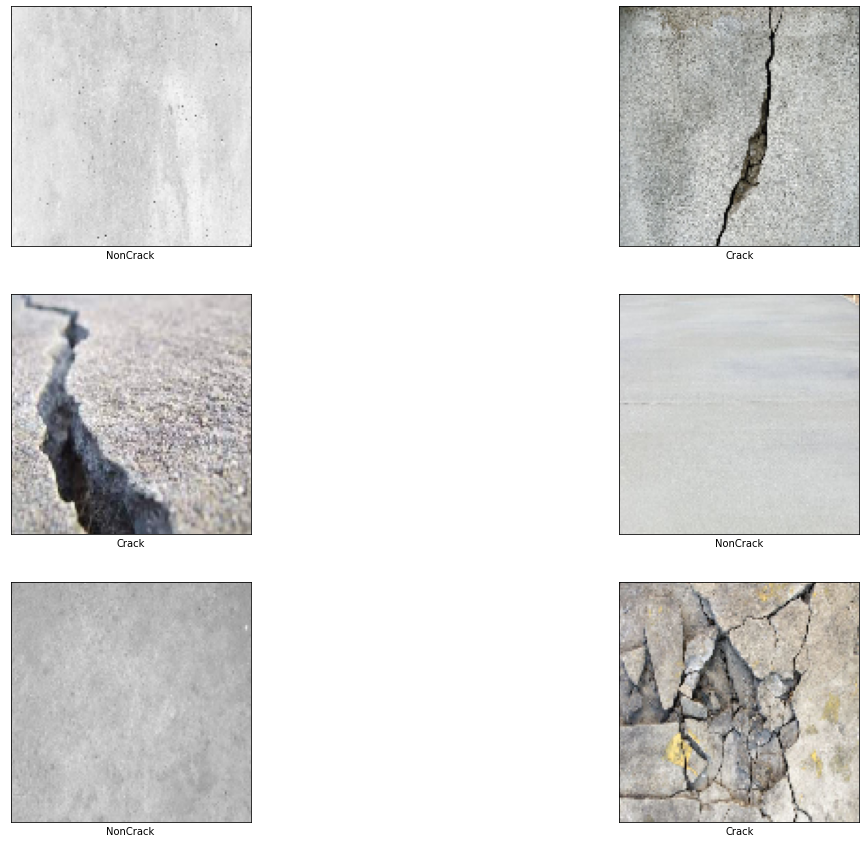

In [36]:
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(image[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[pred_set[i]])